## <span style="color:yellow">Creating Topology</span>

### Generating users

In [1]:
from dataset import generate_users
from constants import *
generated_users = generate_users(WIDTH, HEIGHT,200)

### Making empty regions in topology

In [2]:
from dataset import make_empty_region
region_list= [(0, 0),(0, 1),(0, 2),(0, 3),(1, 0),(1, 1),(1, 2),(1, 3),(2, 0),(2, 1),(2, 2),(2, 3),(3, 0),(3, 1),(3, 2),(3, 3)]
users = make_empty_region(generated_users, WIDTH, HEIGHT, 4, 4, 5, region_list=None)

### Visualize new Topology

F:\DO\hosseini_article\source\visualize.py:235: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


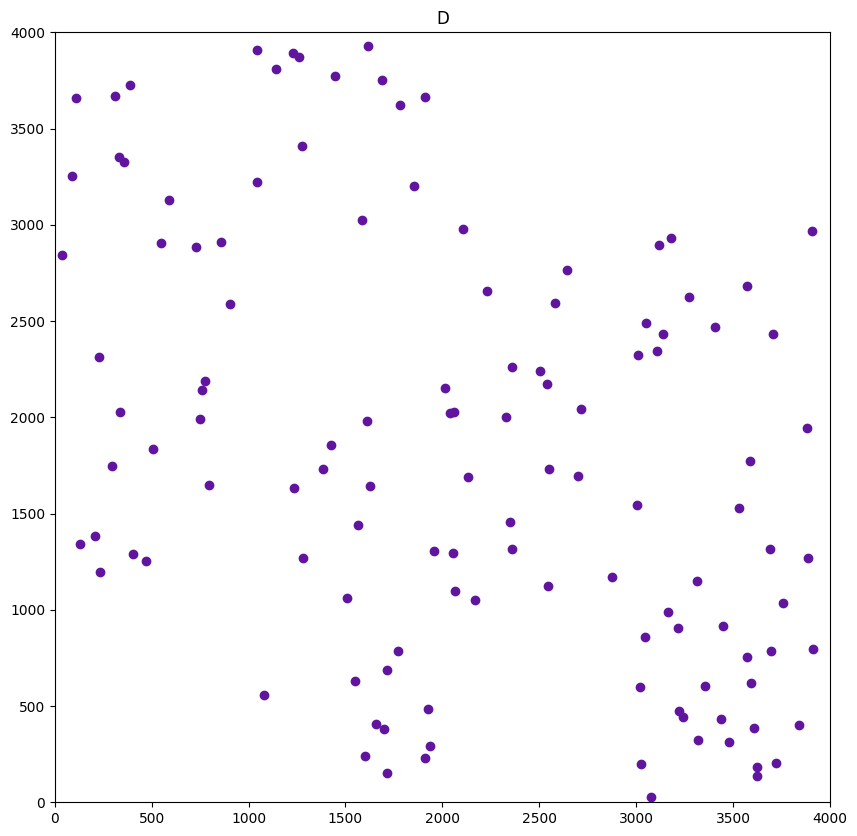

In [3]:
from visualize import plot_topology
from dataset import set_dataset_users
from constants import *
title = "D"
color = [97, 21, 159]
plot_topology(
        users,
        title ,
        color,
        [0, HEIGHT],
        [0, WIDTH],
    )

## <span style="color:yellow">Creating Dataset</span>

### Locating ground bss and finding best number of them with assuming all bss as aerial

In [4]:
from algorithms import locate_ground_bss
from dataset import set_dataset_users
topo_index = 0
result_dict = locate_ground_bss(topo_index,min_n=10, max_n=17)

ValueError: Unable to configure handler 'file_handler_main'

### Removing best bss for creating dataset

In [1]:
import json
import numpy as np
from algorithms import remove_best_bss
from constants import *

topo_index = 0
ground_number = "16"

json_path = f"{GROUND_PLACEMENT_PATH}{TOPO_TITLES[topo_index]}/{GROUND_BSS_FILE}"
print(json_path)
with open(json_path, "r") as file:
    data = json.load(file)
    ground_bss = np.array(data[ground_number]["bss_locations"])

remove_best_bss(topo_index, ground_bss)

./outputs/ground_bss/A/ground_bss.json
[Tue 27 Sep 2022 20:10:41] objective= 26.782
[Tue 27 Sep 2022 20:10:41] --------------> Updating bss powers with piru = 0.10
iteration PROB: 0
better result ---> changing power of bss 2 with weight 0.90 ---> obf_old= 26.7822 obf_new= 26.9871
iteration PROB: 1
better result ---> changing power of bss 6 with weight 0.90 ---> obf_old= 26.9871 obf_new= 27.1813
iteration PROB: 2
better result ---> changing power of bss 2 with weight 0.80 ---> obf_old= 27.1813 obf_new= 27.3763
iteration PROB: 3
better result ---> changing power of bss 2 with weight 0.70 ---> obf_old= 27.3763 obf_new= 27.5511
iteration PROB: 4
better result ---> changing power of bss 13 with weight 0.90 ---> obf_old= 27.5511 obf_new= 27.7255
iteration PROB: 5
better result ---> changing power of bss 6 with weight 0.80 ---> obf_old= 27.7255 obf_new= 27.9020
iteration PROB: 6
better result ---> changing power of bss 0 with weight 0.90 ---> obf_old= 27.9020 obf_new= 28.0675
iteration PROB: 

## <span style="color:yellow">Visualize topologies</span>

In [ ]:
from visualize import plot_topology
from dataset import set_dataset_users
from constants import *
topo_index = 1
title = TOPO_TITLES[topo_index]
color = COLORS_TOPO[topo_index]
users = set_dataset_users(topo_index)
result_path = GENERAL_PATH + title + ".png"
plot_topology(
        users,
        title ,
        color,
        [0, HEIGHT],
        [0, WIDTH],
        result_path,
    )

## <span style="color:yellow">Run MOP</span>

In [ ]:
# dataset_index_bss
##  A  A-2BSS  A-1BSS  B  B-2BSS  B-1BSS  C  C-2BSS  C-1BSS
##  0    1       2     3    4        5    6     7      8

In [1]:
from algorithms import run_mop
run_mop(
        dataset_index_bss=7,
        aerial_bss_number=0,
        method=0
    )

[Sat 01 Oct 2022 10:16:00] objective= 21.712
[Sat 01 Oct 2022 10:16:00] --------------> Updating bss powers with piru = 0.10
iteration PROB: 0
better result ---> changing power of bss 5 with weight 0.90 ---> obf_old= 21.7115 obf_new= 21.9014
iteration PROB: 1
better result ---> changing power of bss 5 with weight 0.80 ---> obf_old= 21.9014 obf_new= 22.0656
iteration PROB: 2
better result ---> changing power of bss 1 with weight 0.90 ---> obf_old= 22.0656 obf_new= 22.2065
iteration PROB: 3
better result ---> changing power of bss 5 with weight 0.70 ---> obf_old= 22.2065 obf_new= 22.3386
iteration PROB: 4
better result ---> changing power of bss 6 with weight 0.90 ---> obf_old= 22.3386 obf_new= 22.4737
iteration PROB: 5
better result ---> changing power of bss 1 with weight 0.80 ---> obf_old= 22.4737 obf_new= 22.5793
iteration PROB: 6
better result ---> changing power of bss 3 with weight 0.90 ---> obf_old= 22.5793 obf_new= 22.6786
iteration PROB: 7
better result ---> changing power of b

### algorithms contribution(PROB,UAC,UPAS)

In [3]:
import json
from constants import *
from utils import algorithms_contribution

dataset_index = 7
method = "ours"

file_path = f"{RESULTS_BASE_PATH}/{method}/{DATASET_TITLES[dataset_index]}_MOP.json"
with open(file_path, "r") as file:
        results = json.load(file)
alg_list = results.get("alg_list")
obf_list = results.get("obf_list")
obf_init = results.get("obf_init")
algorithms_contribution(alg_list, obf_list, obf_init)

iterations ---> prob:122 (78.71%) uac 29 (18.71%) upas 4 (2.58%)
improvements ---> prob:6.55 (64.29%) uac 3.64 (35.71%) upas 0.00 (0.00%)


### Plot weights of each bss

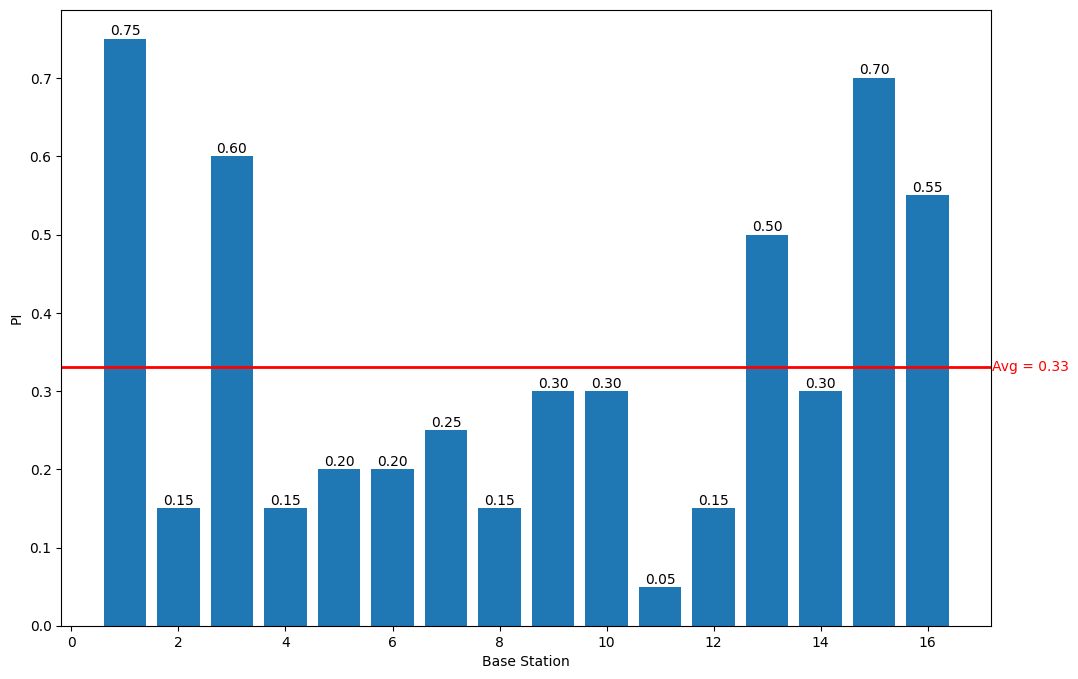

In [1]:
import json
from visualize import plot_bss_weights
from constants import *

dataset_index = 7
method = "ours"

file_path = f"{RESULTS_BASE_PATH}/{method}/{DATASET_TITLES[dataset_index]}_MOP.json"
with open(file_path, "r") as file:
        results = json.load(file)
weights = results.get("bss_weights")
if weights is not None:
    result_path = GENERAL_PATH + "weights_" +DATASET_TITLES[dataset_index] + ".png"
    plot_bss_weights(weights,result_path)

### convergence in each method

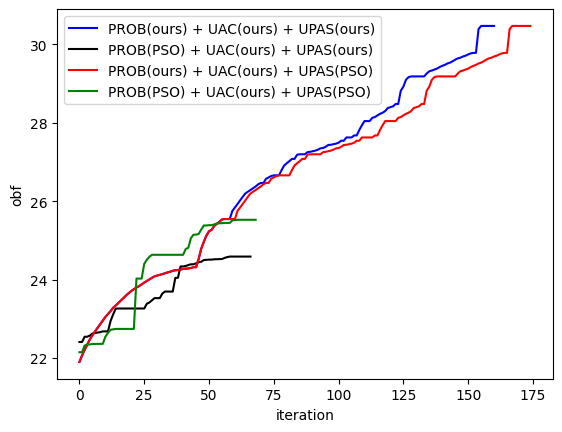

In [3]:
from visualize import multi_plot
from constants import *
import json

dataset_index = 7
title = DATASET_TITLES[dataset_index]
legends = ["PROB(ours) + UAC(ours) + UPAS(ours)",
            "PROB(PSO) + UAC(ours) + UPAS(ours)",
            "PROB(ours) + UAC(ours) + UPAS(PSO)",
            "PROB(PSO) + UAC(ours) + UPAS(PSO)"]

color_list = ["b","k","r","g"]

obfs_list = []
for method in METHODS:
    mop_path = f"{RESULTS_BASE_PATH}/{method}/{title}_MOP.json"
    with open(mop_path, "r") as f:
        saved_results = json.load(f)
    obfs_list.append(saved_results["obf_list"])

# obfs_list = [[20,25,30,46,42],[23,25,30,46,42],[20,25,30,43,42],[20,25,38,46,42],[30,25,30,46,42],[20,25,30,46,42]]

save_path = f"./outputs/general/obf_methods_{title}.png"
multi_plot(None,"iteration", obfs_list, None, color_list,legends ,result_path=None)

## <span style="color:yellow">Run FPA</span>

In [1]:
from algorithms import FPA

dataset_index = 1
max_aerial = 7
max_k = 2
percents = [0.20]
# percents = [.05,.07,.09,.11,.13,.15]
# percents = [0.05,.10,.15,.20,.25,.30,.35,.40]
for p in percents:
    print("starting FPA with percent", p)
    FPA(dataset_index,max_aerial,p,max_k,method=0)

starting FPA with percent 0.2
[Thu 29 Sep 2022 09:01:00] 1.finding aerial :1
[Thu 29 Sep 2022 09:01:00] 2.starting for k 2
[Thu 29 Sep 2022 09:01:01] 3.centroid (1/2): [2218.67594576 2594.08430514] 
[Thu 29 Sep 2022 09:01:05] objective= 13.176
[Thu 29 Sep 2022 09:01:05] --------------> Updating bss powers with piru = 0.10
iteration PROB: 0
better result ---> changing power of bss 14 with weight 0.90 ---> obf_old= 13.1759 obf_new= 13.4847
iteration PROB: 1
better result ---> changing power of bss 14 with weight 0.80 ---> obf_old= 13.4847 obf_new= 13.7689
iteration PROB: 2
better result ---> changing power of bss 12 with weight 0.90 ---> obf_old= 13.7689 obf_new= 14.0395
iteration PROB: 3
better result ---> changing power of bss 14 with weight 0.70 ---> obf_old= 14.0395 obf_new= 14.2976
iteration PROB: 4
better result ---> changing power of bss 6 with weight 0.90 ---> obf_old= 14.2976 obf_new= 14.5508
iteration PROB: 5
better result ---> changing power of bss 12 with weight 0.80 ---> obf

/home/ali/dev/master/network.py:73: RuntimeWarning: invalid value encountered in double_scalars
  avg_R_array[j] = sum_R_array[j] / bss_user_number_array[j]


better result ---> changing power of bss 15 with weight 0.10 ---> obf_old= 29.4154 obf_new= 30.0663
iteration PROB: 1
better result ---> changing power of bss 16 with weight 0.20 ---> obf_old= 30.0663 obf_new= 30.5134
iteration PROB: 2
better result ---> changing power of bss 1 with weight 0.40 ---> obf_old= 30.5134 obf_new= 30.7395
iteration PROB: 3
better result ---> changing power of bss 16 with weight 0.10 ---> obf_old= 30.7395 obf_new= 30.9066
iteration PROB: 4
better result ---> changing power of bss 1 with weight 0.30 ---> obf_old= 30.9066 obf_new= 30.9848
iteration PROB: 5
better result ---> changing power of bss 6 with weight 0.30 ---> obf_old= 30.9848 obf_new= 31.0639
iteration PROB: 6
better result ---> changing power of bss 4 with weight 0.60 ---> obf_old= 31.0639 obf_new= 31.0939
iteration PROB: 7
better result ---> changing power of bss 0 with weight 0.70 ---> obf_old= 31.0939 obf_new= 31.1225
iteration PROB: 8
better result ---> changing power of bss 11 with weight 0.40 

/home/ali/dev/master/network.py:73: RuntimeWarning: invalid value encountered in double_scalars
  avg_R_array[j] = sum_R_array[j] / bss_user_number_array[j]


better result ---> changing power of bss 18 with weight 0.30 ---> obf_old= 26.8621 obf_new= 27.6910
iteration PROB: 1
better result ---> changing power of bss 18 with weight 0.20 ---> obf_old= 27.6910 obf_new= 28.5024
iteration PROB: 2
better result ---> changing power of bss 18 with weight 0.10 ---> obf_old= 28.5024 obf_new= 29.1643
iteration PROB: 3
better result ---> changing power of bss 15 with weight 0.10 ---> obf_old= 29.1643 obf_new= 29.7139
iteration PROB: 4
better result ---> changing power of bss 16 with weight 0.20 ---> obf_old= 29.7139 obf_new= 29.9889
iteration PROB: 5
better result ---> changing power of bss 6 with weight 0.40 ---> obf_old= 29.9889 obf_new= 30.0877
iteration PROB: 6
better result ---> changing power of bss 1 with weight 0.40 ---> obf_old= 30.0877 obf_new= 30.1984
iteration PROB: 7
better result ---> changing power of bss 3 with weight 0.30 ---> obf_old= 30.1984 obf_new= 30.2458
iteration PROB: 8
better result ---> changing power of bss 11 with weight 0.5

### Result of FPA according to aerial numbers for each dataset

/home/ali/share/daneshgah/code/master/visualize.py:344: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


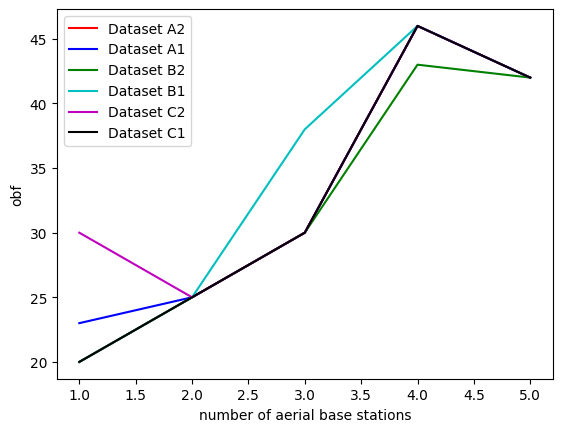

In [2]:
from visualize import multi_plot
from constants import *
import json

method = "ours"
result_dir = f"{RESULTS_BASE_PATH}/{method}"
dataset_indexes = [1, 2, 4, 5, 7, 8]
dataset_titles = [DATASET_TITLES[index] for index in dataset_indexes]
legends = [f"Dataset {title}" for title in dataset_titles]
marker_list = ["o", "P","D",7,"*",6]
color_list = ["r", "b","g","c","m","k"]
aerial_numbers = [1, 2, 3, 4, 5]
p = 0.20  # percent of users

obfs_list = []
for title in dataset_titles:
    obfs = [0] * len(aerial_numbers)
    fpa_path = f"{result_dir}/{title}_FPA.json"
    with open(fpa_path, "r") as f:
        saved_results = json.load(f)
    for result in saved_results:
        if result["p"] == p:
            obfs[result["aerial_number"]] = result["obf"]
    obfs_list.append(obfs)

# obfs_list = [[20,25,30,46,42],[23,25,30,46,42],[20,25,30,43,42],[20,25,38,46,42],[30,25,30,46,42],[20,25,30,46,42]]

save_path = f"./outputs/general/obf_aerials_{method}.png"
multi_plot(aerial_numbers,"number of aerial base stations", obfs_list, marker_list, color_list,legends ,result_path=save_path)

### Run FPA with different values of pi

/home/ali/share/daneshgah/code/master/visualize.py:367: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


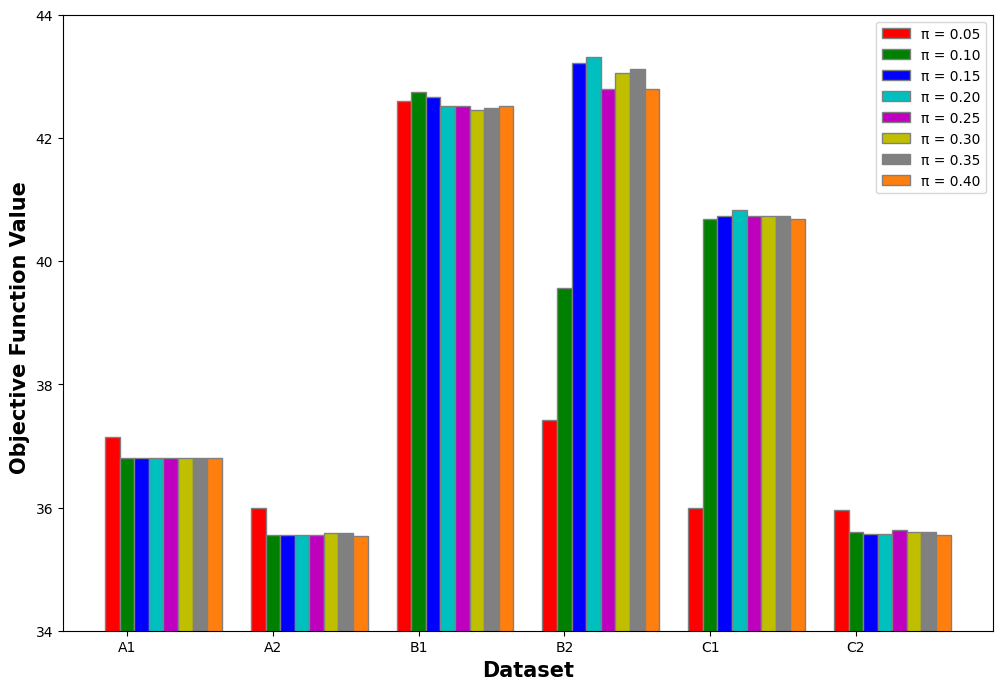

In [1]:
from visualize import plot_pi_values
from constants import *
import numpy as np

method = "ours"
result_dir = f"{RESULTS_BASE_PATH}/{method}"
dataset_indexes = [1, 2, 4, 5, 7, 8]
dataset_titles = [DATASET_TITLES[index] for index in dataset_indexes]
p_list =[ 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40 ]  # percent of users
colors = [ 'r', 'g', 'b', 'c', 'm', 'y', 'gray', 'tab:orange']
legends = [ 'π = 0.05', 'π = 0.10', 'π = 0.15', 'π = 0.20', 'π = 0.25', 'π = 0.30', 'π = 0.35', 'π = 0.40', ]

obfs_list = []
for title in dataset_titles:
    obfs = [0] * len(p_list)
    fpa_path = f"{result_dir}/{title}_FPA.json"
    with open(fpa_path, "r") as f:
        saved_results = json.load(f)
    for result in saved_results:
        if result["aerial_number"] == 1:
            index = p_list.index(result["p"])
            obfs[index] = result["obf"]
    obfs_list.append(obfs)

obfs_list = np.swapaxes(np.array(obfs_list),0,1)
save_path = ""

# obf_list = [
#     [37.15, 35.99, 42.6, 37.42, 35.99, 35.96],
#     [36.81, 35.55, 42.74, 39.56, 40.68, 35.6],
#     [36.81, 35.55, 42.67, 43.21, 40.74, 35.57],
#     [36.81, 35.55, 42.52, 43.31, 40.83, 35.57],
#     [36.81, 35.55, 42.52, 42.79, 40.74, 35.63],
#     [36.81, 35.58, 42.45, 43.05, 40.74, 35.6],
#     [36.81, 35.58, 42.49, 43.12, 40.74, 35.6],
#     [36.81, 35.53, 42.52, 42.79, 40.68, 35.55],
# ]

plot_pi_values(legends,dataset_titles,colors,obfs_list,(34,44))